In [19]:
from Bio import SeqIO
from itertools import islice
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [104]:
class Kmer_spectrum:
    ### This class represents kmer_spectrum of a sequence, kmers have fixed size. ###
    counter = 0
    
    def __init__(self,kmer_name):
        self.sequence = kmer_name
        self.loci = [] # list of found loci coordinates
        self.counter = 1 # the number of appearance of kmer in string

    def increase(self):
        self.counter += 1
        
    def increase_n(self, n):
        self.counter += n
        
    def add_locus(self, chrom, position):
        ### adding a locus start coordinate and read(or chromosome)name ###
        self.loci.append((chrom, position))
        
    def show_loci(self):
        ### show loci in a readable way ###
        for chrom, position in self.loci:
            print("{}\t{}".format(chrom, position))
            
    def load_fastq(path):
        ### load and parse fastq file ###
        return SeqIO.parse(path, "fastq")
    
    def get_spectrum(path, kmer_size, quality):
        ### creates a dictionary of kmers and the loci where they are found ###
        file = Kmer_spectrum.load_fastq(path)
        kmer_dict = {}
        #seq_list = list(islice(file,100))
        seq_list = list(file)
        for seq_record in seq_list:
            seq_lng = len(seq_record.seq)
            seq = seq_record.seq
            for index in range(seq_lng-kmer_size+1):
                current_kmer = seq[index:(index+kmer_size)]
                if np.mean(seq_record.letter_annotations["phred_quality"][index:(index+kmer_size)]) >= quality:
                    if current_kmer in kmer_dict:
                        kmer_dict[current_kmer].increase() #increase counter
                    else:
                        kmer_dict[current_kmer] = Kmer_spectrum(current_kmer)
                    kmer_dict[current_kmer].add_locus(seq_record.name, index)
        return kmer_dict
    
    def get_array(kmer_dict):
        ### convert kmer_dict to array of kmer sequence and the frequency of its appearance ###
        kmer_array = []
        for key in my_dict:
            kmer_array.append((str(key), len([x[1] for x in my_dict[key].loci])))
        kmer_array = sorted(kmer_array, key=lambda x: x[1], reverse=True)
        return kmer_array
    
    def get_freq_dict(kmer_array):
        ### convert kmer array to the dict of frequency and a number of kmers observed with that frequency ###
        result = {}
        for seq, freq in kmer_array:
            if freq not in result:
                result[freq] = 1
            else:
                result[freq] += 1
        return result
            
    def kmer_spectrum_graph(result):
        ### creates a picture of kmer distribution, x is a number of kmers, y is an observed frequency, 
        ### no filtration so far ###
        sorted_result = sorted(result.items(), key= lambda x: x[0])
        x_axis = [x[0] for x in sorted_result]
        y_axis = [x[1] for x in sorted_result]
        #plt.axis([0, 100, 0, 70])
        plt.bar(x_axis, y_axis)
        
    def genome_size(freq_dict, kmer_size):
        ### calculates genome size without kmers with frequency 1 (considered to be noize) ###
        kmer_sum = 0
        freq_dict[1] = 0 # filtering kmers with frequency 1 = noize
        for freq, kmer_n in freq_dict.items():
            kmer_sum += freq*kmer_n
        return kmer_sum/kmer_size
        
            
        

In [ ]:
my_dict = Kmer_spectrum.get_spectrum('./test_kmer.fastq', 5, 30)
for key in my_dict:
    print(key, my_dict[key].loci)

In [100]:
my_array = Kmer_spectrum.get_array(my_dict)
for kmer in my_array:
    print(kmer)

('AAATT', 467)
('AAAAA', 385)
('AATTT', 384)
('TTTTT', 362)
('ATTAA', 236)
('TTAAA', 227)
('AAAAT', 218)
('CTTTT', 205)
('AAAAG', 204)
('TGAAA', 203)
('TTAAT', 201)
('GAAAT', 193)
('TTTAA', 187)
('ACATT', 185)
('TTTTA', 182)
('ATTTG', 181)
('AAAGT', 180)
('TAAAG', 180)
('AATCT', 178)
('ATCTT', 175)
('AGTTA', 169)
('TTGAA', 168)
('TTTGA', 166)
('TCAGC', 164)
('AATTA', 162)
('ATCAG', 159)
('GACTT', 148)
('CAGAA', 145)
('GAAAA', 145)
('TCAGA', 144)
('TTCAA', 143)
('TAATT', 143)
('GAATC', 141)
('CAAAA', 139)
('TCAAA', 137)
('AGCTT', 137)
('AAGCT', 136)
('TAAAT', 133)
('TTGCA', 132)
('AAAGC', 132)
('TAAAA', 132)
('ATTTA', 132)
('TTTAG', 129)
('AGAAA', 129)
('TGCAA', 129)
('AAGTT', 126)
('AACTT', 126)
('AAAGA', 122)
('AATTC', 118)
('AAGTC', 116)
('ATTCA', 112)
('CTAAA', 111)
('TTTCA', 109)
('GCAAC', 104)
('TATAT', 102)
('ATTGA', 100)
('ACTTG', 100)
('TTAAG', 100)
('ACTTC', 100)
('CTTGC', 100)
('CAACT', 99)
('TAAGA', 99)
('CATTG', 99)
('AGACT', 99)
('GACAT', 98)
('TTCGG', 98)
('GTAAA', 98)
('

/home/nastya/anaconda3/lib/python3.5/site-packages/Bio/Seq.py:155: BiopythonWarning: Biopython Seq objects now use string comparison. Older versions of Biopython used object comparison. During this transition, please use hash(id(my_seq)) or my_dict[id(my_seq)] if you want the old behaviour, or use hash(str(my_seq)) or my_dict[str(my_seq)] for the new string hashing behaviour.
  "the new string hashing behaviour.", BiopythonWarning)


In [102]:
result = Kmer_spectrum.get_freq_dict(my_array)


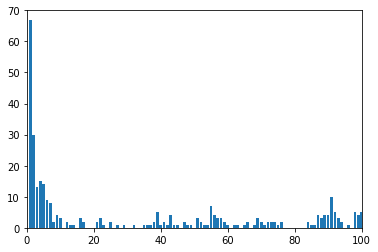

In [103]:
Kmer_spectrum.kmer_spectrum_graph(result)